# Sales Analysis

### import dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Marging 12 months of sales data into a single file 

In [2]:
path = '/Users/kacperleczynski/Desktop/ProjectsML/Pandas/Pandas_Sales_Analysis/Sales_data/'
file_list = [path + f for f in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)


In [3]:
df = pd.read_csv('all_data.csv')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Cleaning Data

In [5]:
df.dropna(axis=0, how='all', inplace=True)

##### Find 'or' and delete it

In [6]:
df = df[df['Order Date'].str[:2] != 'Or']

##### Adding month column

In [7]:
df['Month'] = df['Order Date'].str[:2]
df['Month'] = df['Month'].astype('int32')

### Best month and How much was earned ?

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [9]:
df['Price Each'] = df['Price Each'].astype('float32')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')

In [10]:
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

In [12]:
best_month = df.groupby('Month').sum()['Sales']
best_month

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

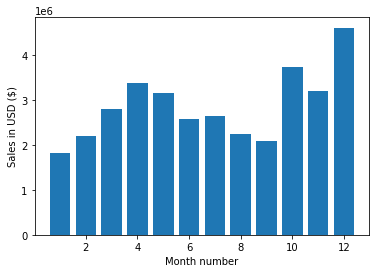

In [13]:
months = range(1,13)
result = df.groupby('Month').sum()
plt.bar(months, result['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### What city had the highest number of sales

##### Adding column with City on specific index

In [14]:
df.insert(5, 'City', 3)

In [47]:
cities = [f"{city.split(',')[1]} ({city.split(',')[2].split(' ')[1]})" for city in df['Purchase Address']]
df['City'] = cities

In [48]:
city_sales = df.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.250,104794,2.795499e+06
Austin (TX),11153,1809873.625,69829,1.819582e+06
Boston (MA),22528,3637409.750,141112,3.661642e+06
Dallas (TX),16730,2752627.750,104620,2.767975e+06
Los Angeles (CA),33289,5421435.000,208325,5.452571e+06
New York City (NY),27932,4635371.000,175741,4.664317e+06
Portland (ME),2750,447189.250,17144,4.497583e+05
Portland (OR),11303,1860558.250,70621,1.870732e+06
San Francisco (CA),50239,8211461.500,315520,8.262204e+06


##### visualizations on the chart

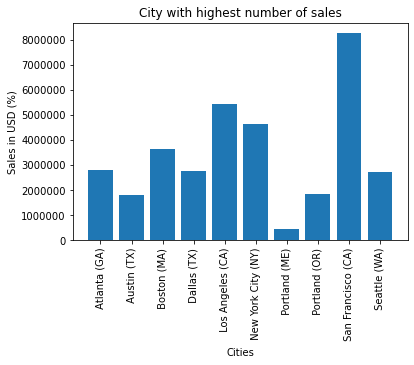

In [106]:
city = df['City'].unique()
city = [city for city, data in df.groupby('City')]
label_format = '{:,.0f}'
plt.bar(city, city_sales['Sales'])
plt.xticks(city, rotation='vertical', size=10)
plt.ylabel('Sales in USD (%)')
plt.xlabel('Cities')
plt.title('City with highest number of sales')
plt.ticklabel_format(style='plain',axis='y',scilimits=(0,0))
plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying product

In [107]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [108]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,New York City (NY),"136 Church St, New York City, NY 10001",12,1700.000000
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,New York City (NY),"562 2nd St, New York City, NY 10001",12,600.000000
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,New York City (NY),"277 Main St, New York City, NY 10001",12,11.950000
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,San Francisco (CA),"410 6th St, San Francisco, CA 94016",12,149.990005
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,Atlanta (GA),"43 Hill St, Atlanta, GA 30301",12,11.950000


In [112]:
df['Hour'] = df['Order Date'].dt.hour
df['Minutes'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,Purchase Address,Month,Sales,Hour,Minutes
0,295665,Macbook Pro Laptop,1,1700.000000,2019-12-30 00:01:00,New York City (NY),"136 Church St, New York City, NY 10001",12,1700.000000,0,1
1,295666,LG Washing Machine,1,600.000000,2019-12-29 07:03:00,New York City (NY),"562 2nd St, New York City, NY 10001",12,600.000000,7,3
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,New York City (NY),"277 Main St, New York City, NY 10001",12,11.950000,18,21
3,295668,27in FHD Monitor,1,149.990005,2019-12-22 15:13:00,San Francisco (CA),"410 6th St, San Francisco, CA 94016",12,149.990005,15,13
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,Atlanta (GA),"43 Hill St, Atlanta, GA 30301",12,11.950000,12,38


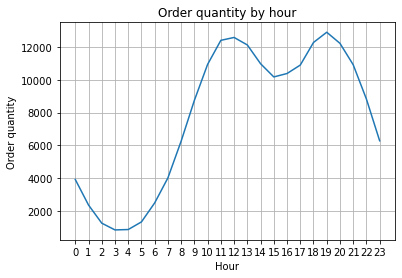

In [121]:
hours = [hour for hour, data in df.groupby('Hour')]
h = df.groupby('Hour')['Quantity Ordered'].count()

plt.plot(hours, h)
plt.title('Order quantity by hour')
plt.ylabel('Order quantity')
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.show()

### What products are most often sold together

In [155]:
duplicated = df[df['Order ID'].duplicated(keep=False)]
duplicated['Grouped'] = duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicated = duplicated[['Order ID', 'Grouped']].drop_duplicates()

/var/folders/lp/3csz0xzx2tq3f4mhq4q0r5g00000gn/T/ipykernel_13930/2208035533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated['Grouped'] = duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


##### Using Counter and combinations tools 

In [161]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicated['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? 

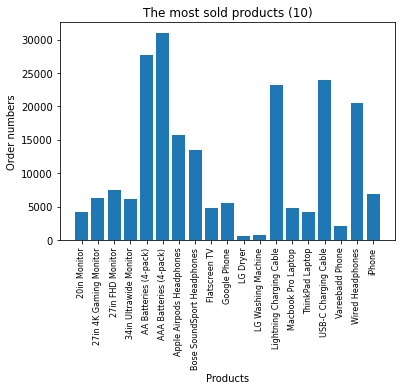

In [189]:
product = [product for product, data in df.groupby('Product')]
order = df.groupby('Product')['Quantity Ordered'].sum()
plt.bar(product, order)
plt.xlabel('Products')
plt.xticks(product, rotation='vertical', size=8)
plt.ylabel('Order numbers')
plt.title('The most sold products (10)')
plt.show()

/var/folders/lp/3csz0xzx2tq3f4mhq4q0r5g00000gn/T/ipykernel_13930/217680710.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)


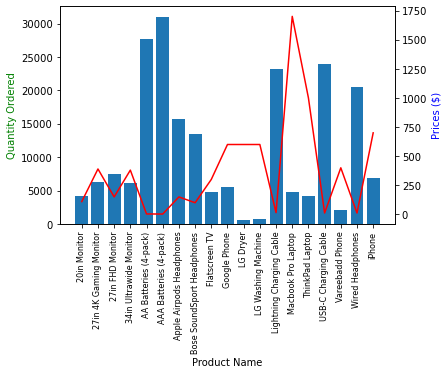

In [195]:
prices = df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product,order)
ax2.plot(product,prices, 'r-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)
plt.show()